Código para sen(x)

Lo primero que debemos hacer es importar los paquetes o librerias correspondientes , en nuestro caso numpy , math , keras , tensorflow
fijamos el generador de números aleatorios para asegurar la repetibilidad en el análisis

In [2]:
import random
import numpy as np
import math
import keras
from keras.layers import Dense , Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
np.random.seed(123)
tf.random.set_seed(123)
print(keras.__version__)
print(np.__version__)

2.7.0
1.21.4


creamos 3 archivos train.txt que contendrá features y labels de los datos de entrenamiento, validation.txt que tiene los features y labels de los datos de validación por último test.txt que son solo las features de los datos test sin labels

In [2]:
outfile = open('train.txt','w')
first = 0
num = 0
for count in range(1000):
    num=(np.sin(first) +np.random.normal(0,0.1)+1)/2
    outfile.write(str(first)+ ' '+str(num)+'\n')
    first=first+(2*math.pi)/1000
outfile.close()
print('data train finished')
#######################################################################
first= 0
outfile = open('test.txt','w')
for count in range(250):
    outfile.write(str(first)+'\n')
    first = first+(2*math.pi+abs(np.random.normal(0,0.01)))/250
outfile.close()
print('data test finished')
######################################################################
first = abs(np.random.normal(0,0.1))
outfile = open('validation.txt','w')
for count in range(250):
    num=(np.sin(first) +np.random.normal(0,0.1)+1)/2
    outfile.write(str(first)+' '+str(num)+'\n')
outfile.close()
print('data validation finished')
######################################################################

data train finished
data test finished
data validation finished


Recogemos los datos en arrays 

In [4]:
#lectura de datos
input = open('train.txt','r')
Lines = input.readlines()
x= np.array([])
y = np.array([])
for line in Lines:
    lineS= line.split(' ')
    x= np.append(x,float(lineS[0]))
    y=np.append(y,float(lineS[1]))
input.close()
input =open('validation.txt','r')
Lines = input.readlines()
validationX = np.array([])
validationY = np.array([])
for line in Lines:
    lineS = line.split(' ')
    validationX = np.append(validationX,float(lineS[0]))
    validationY = np.append(validationY,float(lineS[1]))
input.close()

input = open('test.txt','r')
Lines = input.readlines()
test = np.array([])
for line in Lines:
    test = np.append(test,float(line))
print(len(validationX))



250


Inicializamos la red neuronal será una red sencilla que consta de 2 hidden layers + la input + la output : la input consta de 6 neuronas con activacion relu y una input shape de 1 , las siguientes también son activation relu y las neuronas son 5 y 4 y la de salida es sigmoid y 1 neurona

In [206]:

model = Sequential()
model.add(Dense(6, input_shape = (1,), activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Compilamos el model y seteamos los hiperparámetros la perdida, el optimizador , las métricas y la learning rate
Por otro lado en el fit añadimos 400 epochs , un bs de 32 y los datos de validación , el learning rate tiene un buen impacto a partir de 8e-4,por lo que  hemos usado 1e-3,por último definimos el early stopping que Daniel nos recomendó

In [209]:
earStop = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-6,patience=5,restore_best_weights=True)
callb = [earStop]
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.adam_v2.Adam(learning_rate=1e-3))
history =model.fit(x, y, epochs=150,validation_data=(validationX,validationY), batch_size=10,verbose = 1)

scores = model.evaluate(x, y)


Epoch 1/150
100/100 [==============================] - 1s 5ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 2/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 3/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 4/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 5/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 6/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 7/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 8/150
100/100 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 9/150
100/100 [==============================] - 0s 4ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 10/150
100/100 [==============================] - 0s 4ms/step - loss: 0.0030 - val_lo

KeyboardInterrupt: 

Vemos la predicción de los datos de test y ploteamos también los datos de entrenamiento

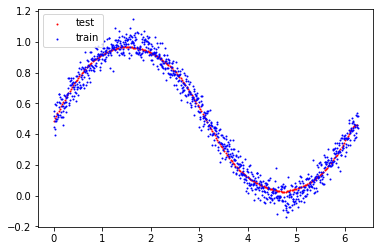

In [208]:
pr = model.predict(test)
x_plot = x
plt.scatter(test,pr,s=1,c='r')
plt.scatter(x_plot,y,s=1,c='b')
plt.legend(['test','train'], loc='upper left')
plt.show()

Representación de solo los datos de test

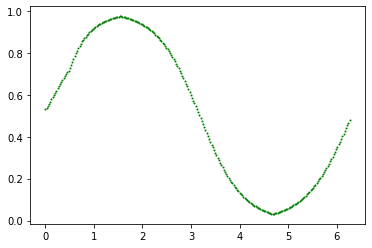

In [201]:
modelo = model.predict(test)
test_plot = test
plt.scatter(test_plot,modelo,s=1,c='g')
plt.show()


Histórico de las métricas

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


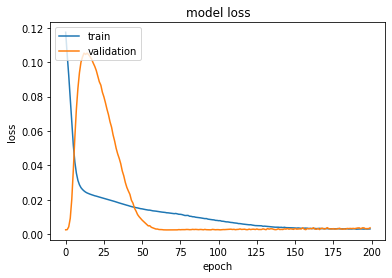

In [152]:
print(history.history.keys())
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Histórico de las métricas

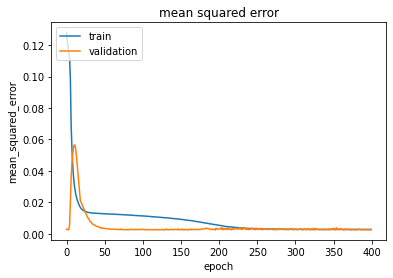

In [114]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean squared error')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend(['train','validation'],loc='upper left')
plt.show()


In [81]:
model.save('modelo_bueno2.h5')

In [82]:
modelo_traido_prueba = keras.models.load_model('modelo_bueno2.h5')

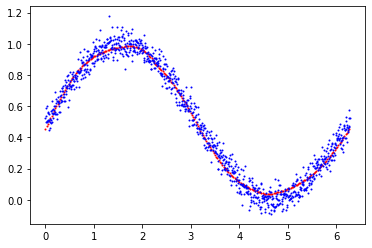

In [91]:
pr = modelo_traido_prueba.predict(test)
x_plot = x
plt.scatter(test,pr,s=1,c='r')
plt.scatter(x_plot,y,s=1,c='b')
plt.show()

In [ ]:
""" import tensorflow as tf
model = tf.keras.models.load_model('modelo_bueno.h5')
tf.saved_model.save(model,'modelo_bueno_tf.pb') """

INFO:tensorflow:Assets written to: modelo_bueno_tf.pb\assets


In [ ]:
""" model_load = keras.models.load_model('modelo_bueno.h5')

model_json = model_load.to_json()
with open("arch.json", "w") as json_file:
    json_file.write(model_json)
model_load.save_weights('weights.h5') """

In [ ]:
""" import keras
model_load = keras.models.load_model('modelo_bueno.h5')
from keras2cpp import export_model
export_model(model_load, 'modeloTFG.model') """

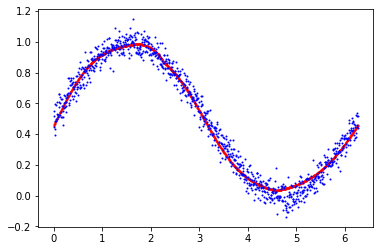

[[ 0.60500383 -0.10923421 -0.27240866 -0.06576556 -0.86349314  0.77838784]]
[[ 1.1787294  -0.94147384  0.23534663 -1.231778    0.1043903 ]
 [ 0.5798617   0.65989095  0.36829084 -0.22266322  0.06969327]
 [-0.3521343   0.29149526 -0.5618499   0.05146718  0.31742364]
 [ 0.553938   -0.23681581 -0.4818644  -0.08589017  0.5920593 ]
 [-0.53465235 -0.55807745  0.11144572  0.6524609   0.61839956]
 [ 0.7778606   0.21373112  0.5779776   0.45337665  1.4730443 ]]
[[ 1.0557992  -0.11581253 -0.7881076  -0.28731504]
 [ 1.1147567  -2.0382295  -0.6969354  -0.8070111 ]
 [-0.4034015   0.07792933  0.31617057 -0.72750276]
 [ 2.3177605  -2.087088    0.32832682 -0.09349203]
 [ 0.5878847   1.0652101  -0.48513106  0.407381  ]]
[[ 1.7256435 ]
 [-1.1105002 ]
 [ 0.1517204 ]
 [-0.11913987]]


In [5]:
 import keras 
model_load = keras.models.load_model('modelo_bueno2.h5')
pr = model_load.predict(x)
x_plot = x
plt.scatter(x_plot,pr,s=1,c='r')
plt.scatter(x_plot,y,s=1,c='b')
plt.show()
np.set_printoptions(suppress=True)
for layer in model_load.layers:
    print(layer.get_weights()[0])

8.940696716308594e-08
5.364418029785156e-07
2.384185791015625e-07
3.5762786865234375e-07
3.2782554626464844e-07
4.470348358154297e-07
0.0
8.940696716308594e-08
2.9802322387695312e-08
3.8743019104003906e-07
8.940696716308594e-08
5.960464477539063e-08
1.1920928955078125e-07
3.5762786865234375e-07
3.5762786865234375e-07
1.7881393432617188e-07
4.172325134277344e-07
5.960464477539063e-08
2.980232238769531e-07
2.384185791015625e-07
0.0
3.5762786865234375e-07
2.980232238769531e-07
4.172325134277344e-07
1.7881393432617188e-07
0.0
3.5762786865234375e-07
2.384185791015625e-07
1.1920928955078125e-07
5.960464477539063e-08
2.980232238769531e-07
3.5762786865234375e-07
1.1920928955078125e-07
2.980232238769531e-07
1.1920928955078125e-07
3.5762786865234375e-07
5.960464477539063e-08
4.172325134277344e-07
0.0
5.960464477539063e-08
1.7881393432617188e-07
2.384185791015625e-07
2.980232238769531e-07
2.384185791015625e-07
2.384185791015625e-07
4.172325134277344e-07
4.76837158203125e-07
3.5762786865234375e-07

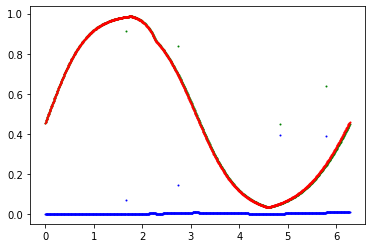

In [19]:
import math
filec = open('res.txt','r');
y1 = np.array([])
err = np.array([])
lines = filec.readlines()
for line in lines:
    y1 = np.append(y1,float(line))


for i in range(y1.size):
    errv = math.sqrt(pow((y1[i]-pr[i]),2))
    print(errv)
    err = np.append(err,errv)
plt.scatter(x_plot,err,s=1,c='b')
plt.scatter(x_plot,y1,s=1,c='g') 
plt.scatter(x_plot,pr,s=1,c='r')
plt.show()
filec.close()